# importaton

In [7]:
#for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
import os
#python machine learning librairies
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#hand made usefull function
from fonctions import *

# 1- define task

## "use lifeexp and unemployment rate in a long-term to predict happiness (Low or High)of the country"

# 2-Acquire clean data

In [8]:
#os.chdir("/Users/admin/Documents/my AI models")
data=pd.read_csv("data.csv",sep=";")
data

,country,lifeexp,unemployment,happiness
0,Albania,77.6,6.09,Low
1,Bulgaria,75.0,3.24,Low
2,Iran,75.8,2.11,Low
3,Ukraine,71.9,1.53,Low
4,South Africa,61.8,7.52,Low
5,Ukraine,71.9,1.53,Low
6,Austria,81.4,1.43,High
7,Croatia,77.3,5.53,High
8,Denmark,80.7,1.36,High
9,Portugal,80.8,4.37,High


# 3-Understand data

## a-subset: inspect data 

In [9]:
data.head()

,country,lifeexp,unemployment,happiness
0,Albania,77.6,6.09,Low
1,Bulgaria,75.0,3.24,Low
2,Iran,75.8,2.11,Low
3,Ukraine,71.9,1.53,Low
4,South Africa,61.8,7.52,Low


In [10]:
data.describe()

,lifeexp,unemployment
count,12.000000,12.000000
mean,75.741667,2.910833
std,5.375104,2.434526
min,61.800000,0.060000
25%,74.225000,1.412500
50%,77.200000,1.820000
75%,78.375000,4.660000
max,81.400000,7.520000


In [11]:
data.shape

(12, 4)

In [12]:
dataTab=data[['lifeexp','unemployment']]

In [13]:
dataTab=dataTab[:].astype('float')
dataTab

,lifeexp,unemployment
0,77.6,6.09
1,75.0,3.24
2,75.8,2.11
3,71.9,1.53
4,61.8,7.52
5,71.9,1.53
6,81.4,1.43
7,77.3,5.53
8,80.7,1.36
9,80.8,4.37


In [14]:
nb,minmax,m,v,sk,kr=stat.describe(data['lifeexp'],axis=0)
print("{:<20s}{}\n{:<20s}{:.2f}\n{:<20s}{:.2f}\n{:<20s}{:.2f}\n{:<20s}{:.2f}\n{:<20s}{:.2f}\n{:<20s}{:.2f}"
.format('Effectif',nb,'Min',minmax[0],'Max',minmax[1],'Moyenne',m,'Variance',v,'Skewness',sk,'Kurtosis',kr))

Effectif            12
Min                 61.80
Max                 81.40
Moyenne             75.74
Variance            28.89
Skewness            -1.45
Kurtosis            1.82


In [15]:
nb,minmax,m,v,sk,kr=stat.describe(data['unemployment'],axis=0)
print("{:<20s}{}\n{:<20s}{:.2f}\n{:<20s}{:.2f}\n{:<20s}{:.2f}\n{:<20s}{:.2f}\n{:<20s}{:.2f}\n{:<20s}{:.2f}"
.format('Effectif',nb,'Min',minmax[0],'Max',minmax[1],'Moyenne',m,'Variance',v,'Skewness',sk,'Kurtosis',kr))

Effectif            12
Min                 0.06
Max                 7.52
Moyenne             2.91
Variance            5.93
Skewness            0.62
Kurtosis            -0.89


## b-subset:visualize data

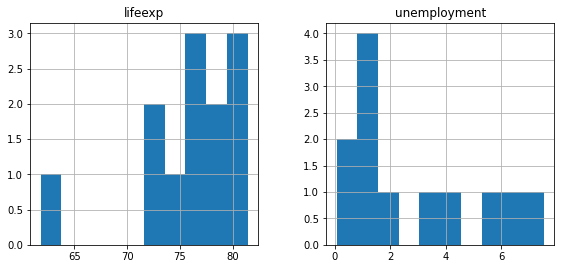

In [16]:
histPlotAll(data)

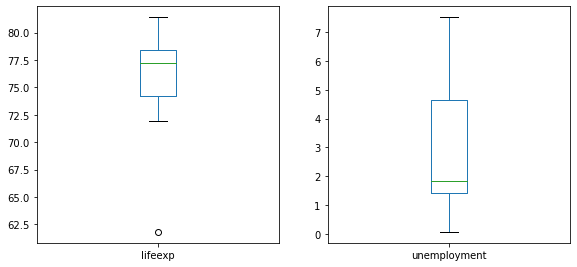

In [18]:
boxPlotAll(data)

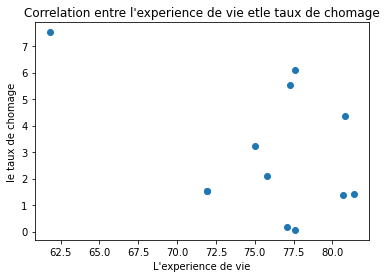

In [20]:
mybox=plt.scatter(data['lifeexp'],data['unemployment'])
plt.title("Correlation entre l'experience de vie etle taux de chomage")
plt.xlabel("L'experience de vie")
plt.ylabel("le taux de chomage")
plt.show()

Comparative histograms for ['Low' 'High']


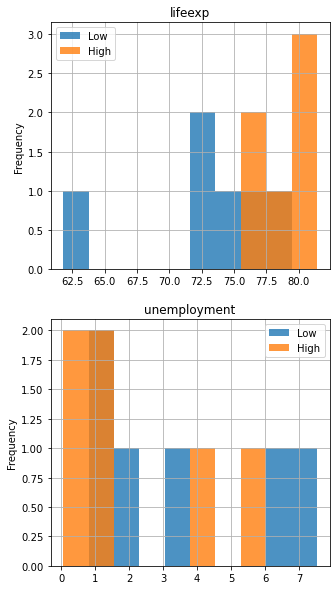

In [22]:
classComparePlot(data[["happiness","lifeexp","unemployment"]],"happiness",plotType="hist")

## 4 Prepare data for the models

In [23]:
y=data['happiness']
y

0      Low
1      Low
2      Low
3      Low
4      Low
5      Low
6     High
7     High
8     High
9     High
10    High
11    High
Name: happiness, dtype: object

In [24]:
X=data[["lifeexp","unemployment"]]
X

,lifeexp,unemployment
0,77.6,6.09
1,75.0,3.24
2,75.8,2.11
3,71.9,1.53
4,61.8,7.52
5,71.9,1.53
6,81.4,1.43
7,77.3,5.53
8,80.7,1.36
9,80.8,4.37


# 5-Build models

## a-Split feature into training set and test set

In [25]:
test_size=0.33
seed=7
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=test_size,random_state=seed)

In [26]:
X_train

,lifeexp,unemployment
0,77.6,6.09
1,75.0,3.24
11,77.6,0.06
8,80.7,1.36
3,71.9,1.53
6,81.4,1.43
9,80.8,4.37
4,61.8,7.52


In [27]:
X_test

,lifeexp,unemployment
7,77.3,5.53
10,77.1,0.16
2,75.8,2.11
5,71.9,1.53


In [28]:
y_train

0      Low
1      Low
11    High
8     High
3      Low
6     High
9     High
4      Low
Name: happiness, dtype: object

In [29]:
y_test

7     High
10    High
2      Low
5      Low
Name: happiness, dtype: object

## b-Select an Algorithm

In [31]:
model=DecisionTreeClassifier()
model

DecisionTreeClassifier()

## c-Fit the Model

In [32]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

## d-Check the model

In [33]:
predictions=model.predict(X_train)
predictions

array(['Low', 'Low', 'High', 'High', 'Low', 'High', 'High', 'Low'],
      dtype=object)

In [35]:
accuracy_score(y_train,predictions)

1.0

# 6-Evalute the Model

In [36]:
predictions=model.predict(X_test)
accuracy_score(y_test,predictions)

0.75

In [38]:
result=X_test.copy()
result["Actual"]=y_test
result["Predictions"]=predictions
result

,lifeexp,unemployment,Actual,Predictions
7,77.3,5.53,High,Low
10,77.1,0.16,High,High
2,75.8,2.11,Low,Low
5,71.9,1.53,Low,Low


# Examinate the rules set by Sklearn

In [52]:
viewDecisionTree(model,X.columns)

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH